## PROGRAMAÇÃO EM PYTHON - FERNANDO FELTRIN

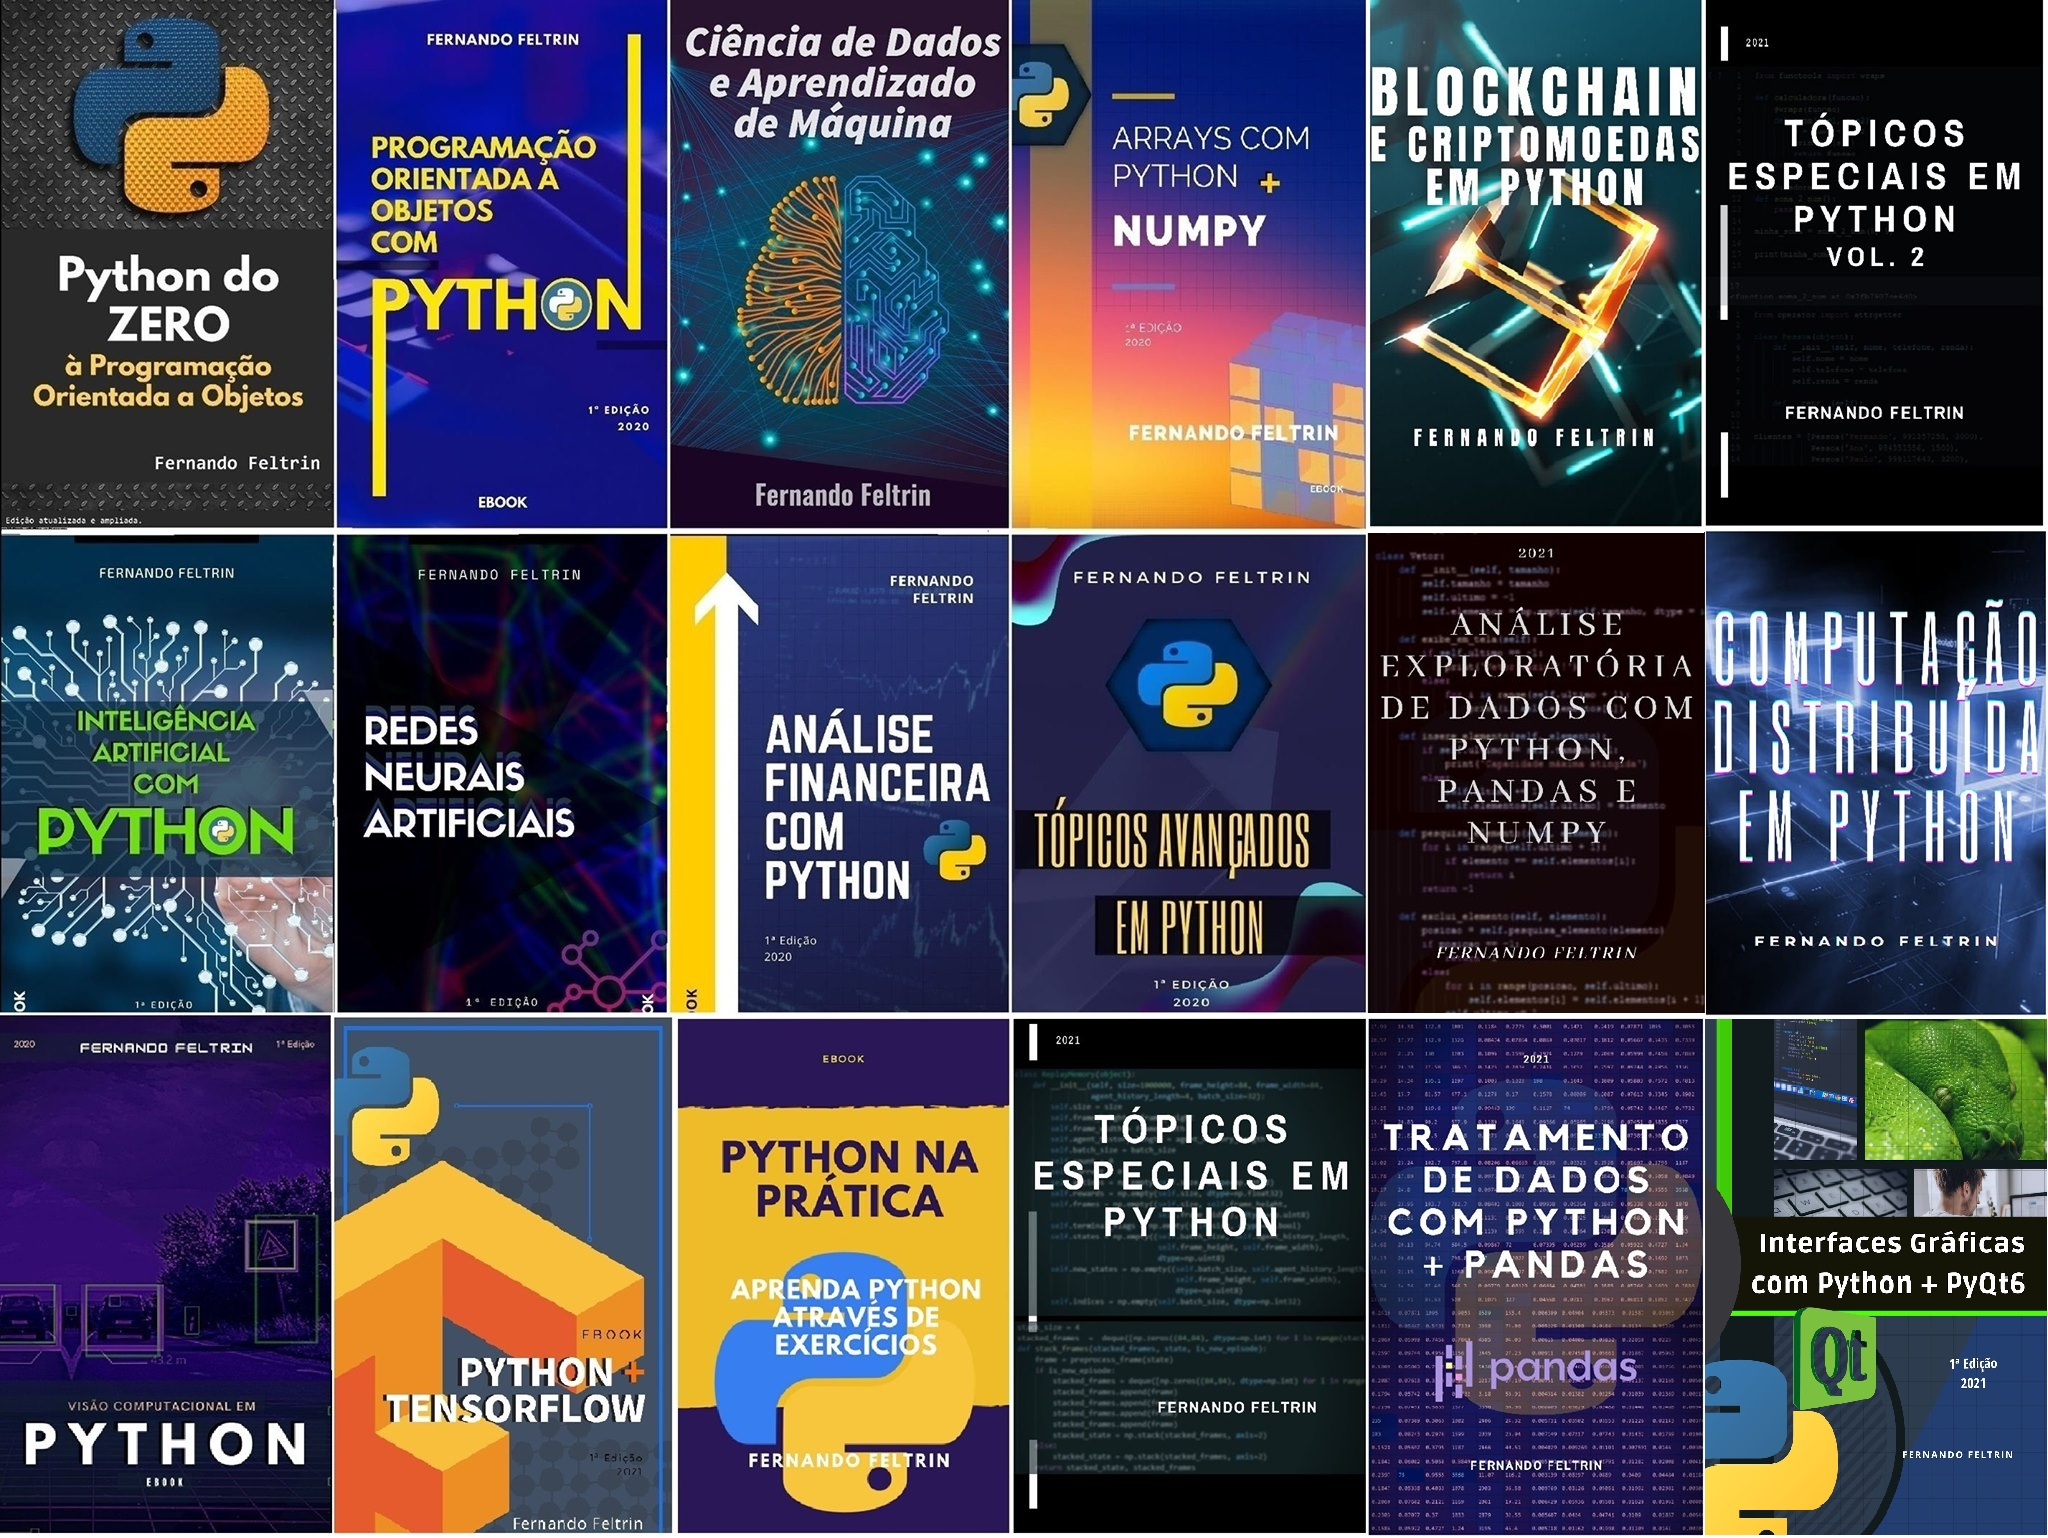

[Compre já em Amazon.com](https://www.amazon.com.br/s?i=digital-text&rh=p_27%3AFernando+Feltrin&s=relevancerank&text=Fernando+Feltrin&ref=dp_byline_sr_ebooks_1)


## Classificação Multiclasse via TensorFlow

In [ ]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
(X_treino, y_treino), (X_teste, y_teste) = fashion_mnist.load_data()

print(X_treino)
print(X_treino[0]) # visualizando o primeiro elemento
print(y_treino)
print(y_treino[0])


In [ ]:
X_treino = X_treino / 255.0 # convertendo da escala 0-255 para escala 0-1
X_teste = X_teste / 255.0

print(X_treino[0])


In [ ]:
# Remodelando a base de dados

print(X_treino.shape)

X_treino = X_treino.reshape(-1, 28*28) # -1 significa todos elementos, altura*largura

print(X_treino.shape)

X_teste = X_teste.reshape(-1, 28*28)


In [ ]:
modelo = tf.keras.models.Sequential()

modelo.add(tf.keras.layers.Dense(units = 128,
                                 activation = 'relu',
                                 input_shape = (784, )))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense(units = 10,
                                 activation = 'softmax'))
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['sparse_categorical_accuracy'])


In [ ]:
print(modelo.summary())


In [ ]:
# Treinando o modelo

modelo.fit(X_treino,
           y_treino,
           epochs = 100)


In [ ]:
# Avaliando o modelo

margem_erro, margem_acerto = modelo.evaluate(X_teste,
                                             y_teste)

print(f'Margem de Precisão: {margem_acerto}')
print(f'Margem de Erro: {margem_erro}')


In [ ]:
# Salvando o modelo

modelo_json = modelo.to_json()
with open("fashion_modelo.json", "w") as json_file:
    json_file.write(modelo_json)


In [ ]:
# Salvando os pesos

modelo.save_weights("fashion_modelo.h5")
